# Compare NIST energy levels data

In [ ]:
# Uncomment the next line if you have ipympl installed and want interactive plots
# %matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

from ryd_numerov.species import Strontium88

In [ ]:
species = Strontium88(use_nist_data=True, nist_n_max=60)
species_without_nist = Strontium88(use_nist_data=False)
s_tot = 0  # singlet

energies_with_nist = []
energies_without_nist = []
labels = []
n_list = []

l_int2str = {0: "s", 1: "p", 2: "d", 3: "f", 4: "g", 5: "h", 6: "i", 7: "j"}
for n in range(5, 25):
    for l in range(n):
        if not species.is_allowed_shell(n, l, s_tot):
            continue
        for _j_tot in np.arange(abs(l - s_tot), l + s_tot + 1):
            j_tot = float(_j_tot)
            if (n, l, j_tot, s_tot) not in species._nist_energy_levels:  # noqa: SLF001
                continue

            labels.append(f"{n}{l_int2str.get(l, ',' + str(l))}_{j_tot:.1f}")
            energies_with_nist.append(species.calc_energy(n, l, j_tot, s_tot, unit="hartree"))
            energies_without_nist.append(species_without_nist.calc_energy(n, l, j_tot, s_tot, unit="hartree"))
            n_list.append(n)

energies_with_nist = np.array(energies_with_nist) + species.get_ionization_energy(unit="hartree")
energies_without_nist = np.array(energies_without_nist) + species_without_nist.get_ionization_energy(unit="hartree")

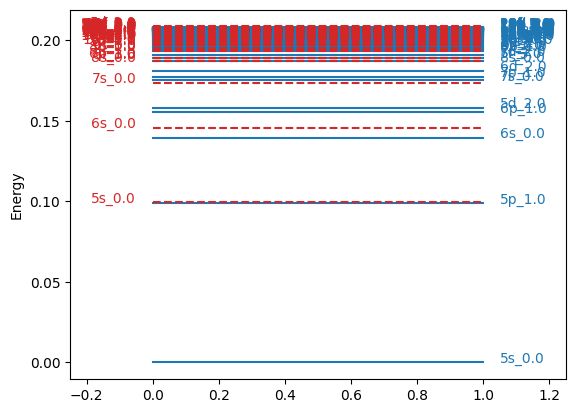

In [3]:
fig, ax = plt.subplots()

ax.set_ylabel("Energy")
if False:  # Change to True if you want to scale energies by n^2
    energies_with_nist *= np.array(n_list) ** 2
    energies_without_nist *= np.array(n_list) ** 2
    ax.set_ylabel("Energy * n^2")

for i, label in enumerate(labels):
    if energies_with_nist[i] < 0 or energies_without_nist[i] < 0:
        print(
            f"Skipping negative energy for {label}: "
            f"{energies_with_nist[i]} (with NIST), "
            f"{energies_without_nist[i]} (without NIST)"
        )
        continue
    ax.plot([0, 1], [energies_with_nist[i]] * 2, "C0", zorder=-10)
    ax.plot([0, 1], [energies_without_nist[i]] * 2, "C3--", zorder=10)
    ax.text(1.05, energies_with_nist[i], label, color="C0")
    ax.text(-0.05, energies_without_nist[i], label, color="C3", ha="right")

ax.set_xlim(-0.25, 1.25)

plt.show()

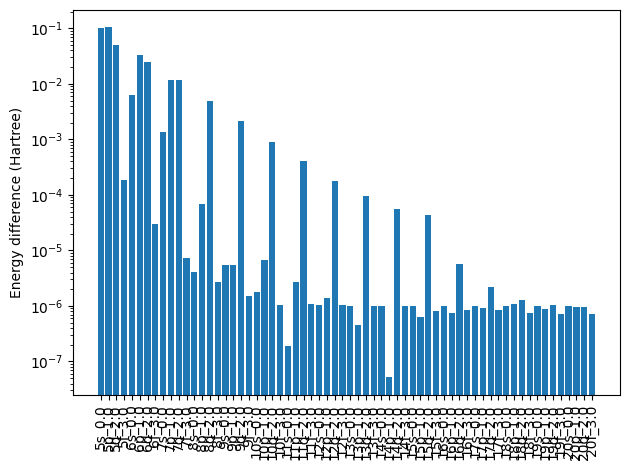

In [4]:
energies_diff = np.abs(np.array(energies_with_nist) - np.array(energies_without_nist))

fig, ax = plt.subplots()
ax.bar(np.arange(len(energies_diff)), energies_diff, tick_label=labels, color="C0")
ax.set_ylabel("Energy difference (Hartree)")
ax.set_xticklabels(labels, rotation=90)

ax.set_yscale("log")

fig.tight_layout()
plt.show()